In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

In [95]:
#df is the prepared data frame after feature selection
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansready.pkl')

In [96]:
#define columns to look at and test

# infocols = ['poet_name','poet_url','poet_poems_url','poet_bio','city','state','country','primary_tag','tags','tag2','tag3','tag4','poem_yrpub']
poemcols = ['poem_link', 'poem_title', 'title_clean','poem_text', 'sentences_x']
outcome = ['label', 'strlabel', 'poet_name', 'primary_tag', 'poem_link', 'text']

#EXCLUDE wordcount, wordcount_d, 'yrpub', 'numlines','numstanzas',
numerical = ['avgline_stanza','enj_score','ttr','abstraction_score', 'lesk_abs_score', 'pronoun_score', 
             'conjunction_ratio','nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore',
             'avg_vps_cscore','avg_aps_cscore','1w_nps_fr','2w_nps_fr','3w_nps_fr']

In [97]:
kdf = df[numerical]
odf = df[outcome]

In [98]:
print len(df), len(df.poet_name.value_counts())
# kdf.columns

1287 307


##Let's run K means to figure out what my K is

In [99]:
X = kdf[numerical]

for k in xrange(2,12):
    km = KMeans(n_clusters=k, init = 'k-means++', random_state=1) #default max inter = 300
    km.fit(X)
    labels = km.labels_
    print k, metrics.silhouette_score(X, labels, metric='euclidean')

2 0.755318414504
3 0.687621423515
4 0.671425328221
5 0.510661976715
6 0.518694534922
7 0.504837231421
8 0.531609909754
9 0.521442663407
10 0.453711694006
11 0.514206271711


##It looks like K=2 may be the best although possible K=2 and K =3 may work as well

In [100]:
type(X)
##change to array for plotting
Xx = X.as_matrix()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.75531841450419268)


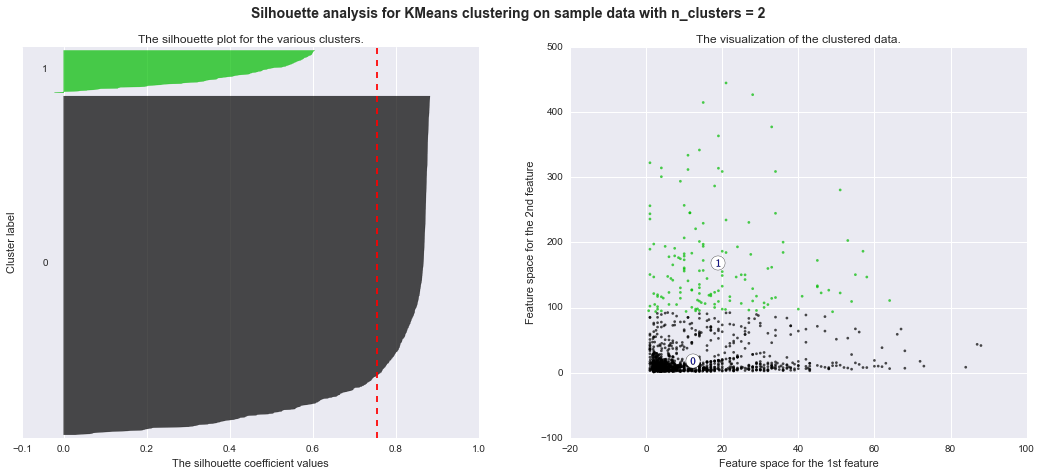

('For n_clusters =', 3, 'The average silhouette_score is :', 0.68762142351525435)


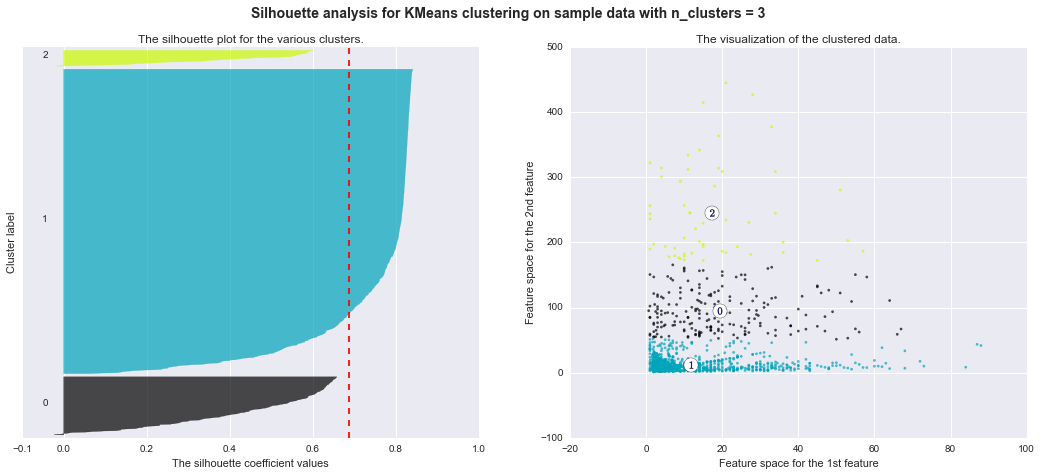

In [101]:
##THIS SECTION IS TAKEN FROM SKLEARN DEMO

range_n_clusters = [2, 3]
#                     , 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xx) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Xx)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(Xx, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(Xx, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xx[:, 0], Xx[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## lets test the stability of our Kmeans

In [103]:
def shuffle_dataframe(df):
    df2 = df.reindex(np.random.permutation(df.index))
    return df2

In [104]:
##test
kdf
X = shuffle_dataframe(kdf[numerical])
X.head()

,avgline_stanza,enj_score,ttr,abstraction_score,lesk_abs_score,pronoun_score,conjunction_ratio,nps_ratio,vps_ratio,aps_ratio,avg_nps_cscore,avg_vps_cscore,avg_aps_cscore,1w_nps_fr,2w_nps_fr,3w_nps_fr
814,9.000000,2.333333,0.836364,1.423011,1.125000,0.333333,5.000000,0.380952,0.428571,0.190476,1.000000,1.888889,1.500000,1.000000,0.000000,0.000000
563,4.090909,45.000000,0.723529,1.551403,1.241830,0.000000,40.000000,0.564516,0.258065,0.177419,1.914286,2.812500,1.000000,0.428571,0.314286,0.200000
142,32.000000,60.500000,0.769697,1.247361,1.226415,0.125000,1.625000,0.547619,0.250000,0.202381,1.434783,2.000000,1.058824,0.608696,0.347826,0.043478
693,2.000000,17.615385,0.745614,1.356516,1.203704,0.076923,0.769231,0.448980,0.448980,0.102041,1.454545,1.772727,1.000000,0.636364,0.272727,0.090909
134,36.000000,4.285714,0.709845,1.234569,1.188406,0.285714,5.142857,0.540541,0.364865,0.094595,1.425000,2.037037,1.428571,0.600000,0.375000,0.025000


In [106]:
##I'm doing this based on something I learned about kmeans being sensitive to the order of the variables, that if
#the scores have high variance its a bad sign

scores = []
for i in range(0,10):
    X = shuffle_dataframe(kdf[numerical])
    km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
    Y_hat = km.fit(X).labels_
    # centroids = km.cluster_centers_
    # y = km.predict(X)
    sc = metrics.silhouette_score(X, Y_hat, metric='euclidean')
    print sc
    scores.append(sc)

# scores = np.array(scores)
print "\n"+str(np.var(scores))

0.755318414504
0.755318414504
0.755318414504
0.755318414504
0.755318414504
0.755318414504
0.755318414504
0.755318414504
0.755318414504
0.755318414504

8.62816615085e-33


In [107]:
X = kdf[numerical]
km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
Y_hat = km.fit(X).labels_
centroids = km.cluster_centers_
y = km.predict(X)

In [108]:
##Lets see the labels from my model with the data itself

y = pd.DataFrame(y)
y.columns = ['km'] # column named 'KM' are the labels from my model

In [109]:
td1 = pd.concat([df[numerical], y], axis = 1)

In [110]:
td = td1.groupby('km').mean().transpose()
print td

km                         0           1
avgline_stanza     12.408714   18.788938
enj_score          17.538412  168.182743
ttr                 0.691225    0.728873
abstraction_score   1.282591    1.284238
lesk_abs_score      1.149193    1.160600
pronoun_score       0.382503    0.431686
conjunction_ratio   5.304368    5.236365
nps_ratio           0.522547    0.522280
vps_ratio           0.338564    0.329023
aps_ratio           0.138889    0.148697
avg_nps_cscore      1.538083    1.566985
avg_vps_cscore      1.993940    2.005049
avg_aps_cscore      1.177951    1.166097
1w_nps_fr           0.615495    0.598470
2w_nps_fr           0.256759    0.258178
3w_nps_fr           0.110424    0.124274


#Let's try visually looking at the centroids

In [111]:
# td1.columns
# centroids
centroids = pd.DataFrame(centroids, columns=numerical)
print centroids
centroids["km"] = ["0 centroid", "1 centroid"]

   avgline_stanza   enj_score       ttr  abstraction_score  lesk_abs_score  \
0       12.408714   17.538412  0.691225           1.282591        1.149193   
1       18.788938  168.182743  0.728873           1.284238        1.160600   

   pronoun_score  conjunction_ratio  nps_ratio  vps_ratio  aps_ratio  \
0       0.382503           5.304368   0.522547   0.338564   0.138889   
1       0.431686           5.236365   0.522280   0.329023   0.148697   

   avg_nps_cscore  avg_vps_cscore  avg_aps_cscore  1w_nps_fr  2w_nps_fr  \
0        1.538083        1.993940        1.177951   0.615495   0.256759   
1        1.566985        2.005049        1.166097   0.598470   0.258178   

   3w_nps_fr  
0   0.110424  
1   0.124274  


In [112]:
full_ds = pd.concat([td1, centroids], ignore_index=True)

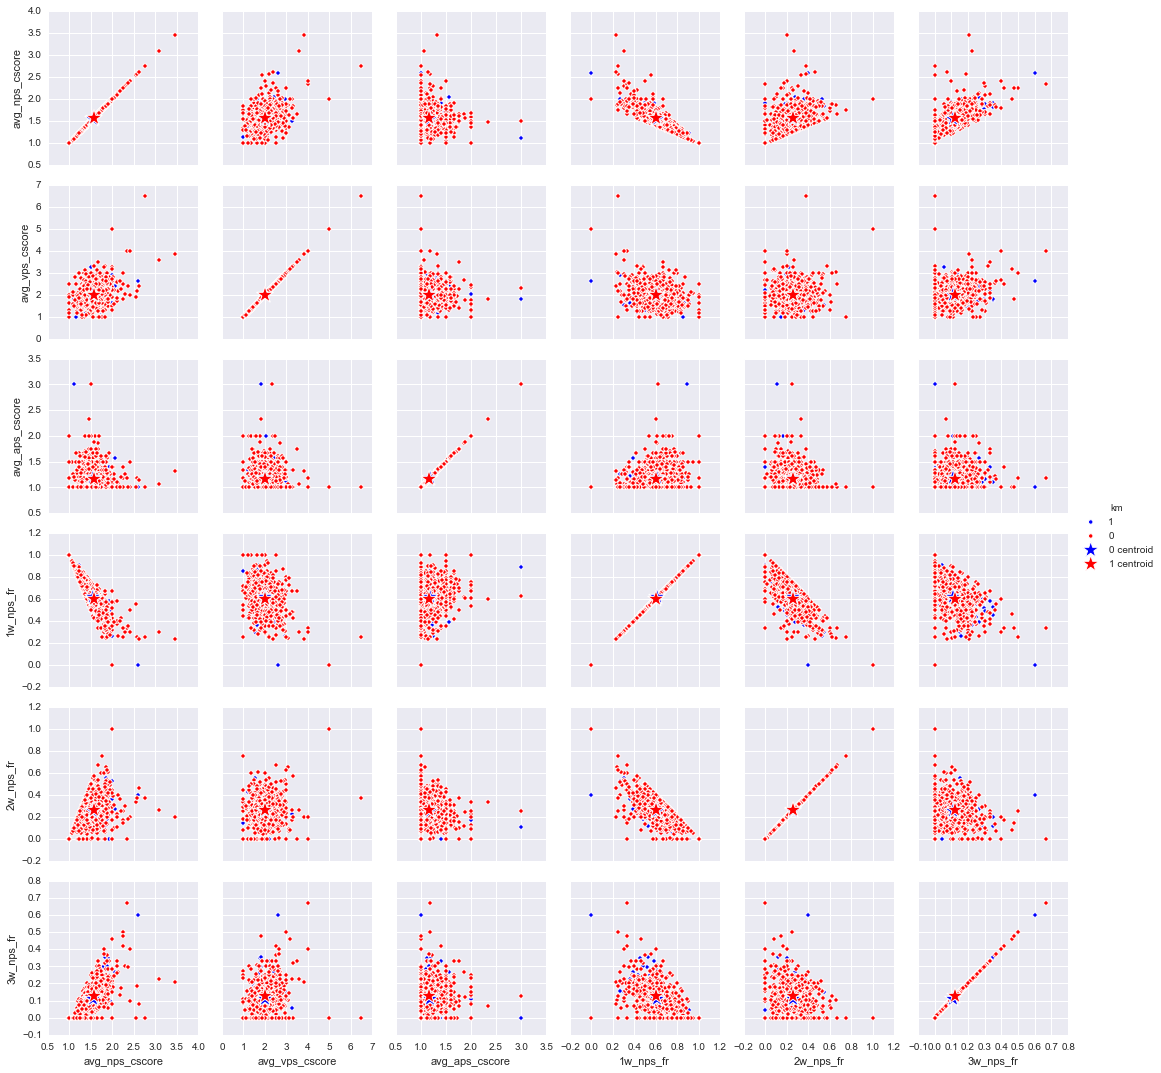

In [113]:
##I run this a bunch of times to look

g = sns.PairGrid(full_ds.ix[:,10:], hue="km",
#                  hue_order=["0", "1", "0 centroid", "1 centroid"], #the hue_order makes dots disappear!!!!
                 palette=["b", "r", "b", "r"],
                 hue_kws={"s": [20, 20, 300, 300],
                          "marker": ["o", "o", "*", "*"]}
                )
g.map(plt.scatter, linewidth=1, edgecolor="w")
g.add_legend()

In [114]:
# print len(full_ds)
# ##We should drop the centroid rows used for plotting above

full_ds = full_ds[:1287]

##I want to see the full set
fdf = pd.concat([full_ds, df[outcome]], axis = 1)
# fdf.tail()

In [115]:
fdf.groupby("km").agg({"primary_tag": pd.Series.nunique})

,primary_tag
km,
0,19
1,15


In [116]:
fdf.query("km == 1")['primary_tag'].value_counts()

Contemporary          78
Modernism             20
HarlemRenaissance      7
Imagism                7
ConfessionalPoetry     6
Symbolists             6
LanguagePoetry         5
Beat                   3
Surrealism             3
DarkRoomCollective     2
ConcretePoetry         2
BlackMountain          2
JazzPoetry             1
Slam/SpokenWord        1
NewYorkSchool          1
dtype: int64

In [117]:
fdf.query("km == 0")['primary_tag'].value_counts()

Contemporary               587
Modernism                   88
NewYorkSchool               59
Surrealism                  50
LanguagePoetry              50
Imagism                     45
ConfessionalPoetry          40
JazzPoetry                  36
Symbolists                  29
Objectivists                28
HarlemRenaissance           26
Beat                        26
BlackMountain               20
ConcretePoetry              14
BlackArts                   14
DarkRoomCollective          13
ConceptualPoetry             9
SanFranciscoRenaissance      7
Slam/SpokenWord              2
dtype: int64

#Validation
## Benchmark against external classification e.g. the movement as tagged by Poets.org

In [118]:
##assuming labels are flipped because the other way around is terrible
true_neg = len(fdf.query("km == 0 and label == 0")[['label', 'km']])
true_pos = len(fdf.query("km == 1 and label == 1")[['label', 'km']])
false_neg = len(fdf.query("km == 0 and label == 1")[['label', 'km']])
false_pos = len(fdf.query("km == 1 and label == 0")[['label', 'km']])

In [119]:
print '\t Actual','Y','  ','N','\n\n','Predicted yes\t', true_pos, false_pos, '\nPredicted No\t',true_neg, false_neg

	 Actual Y    N 

Predicted yes	78 66 
Predicted No	528 615


In [120]:
Accuracy = (true_pos+true_neg)/float(len(fdf))
True_posRate = true_pos/float(true_pos + false_neg) #AKA Sensitivity, Recall
Error = 1 - True_posRate
False_posRate = false_pos/float(false_pos + true_neg)
Specificity = 1 - False_posRate
Precision = true_pos/float(true_pos + false_pos)
Prevalence = (true_pos + false_neg)/float(len(fdf))
print 'Accuracy = ', Accuracy
print 'Error Rate = ', Error
print 'Sensitivity = ', True_posRate
print 'Specificity = ', Specificity
print 'Precision = ',Precision

Accuracy =  0.470862470862
Error Rate =  0.887445887446
Sensitivity =  0.112554112554
Specificity =  0.888888888889
Precision =  0.541666666667


##Is it possible that the label of 1 for contemporary and 0 for not, are wrong?
###YES - no idea what contemporary label means as defined by poets.org
###Are the clusters something different????

In [121]:
f = pd.DataFrame(fdf.query("km == 0")['poet_name'].value_counts(), columns =  ['num_0'])
nf = pd.DataFrame(fdf.query("km == 1")['poet_name'].value_counts(), columns = ['num_1'])

In [122]:
len(fdf.poet_name.value_counts())

fnf = pd.merge(f, nf, how='outer', on=None, left_index=True, right_index=True)

In [123]:
fnf.fillna(0, inplace = True)

In [125]:
print len(fnf.query('num_0 > 0 and num_1 > 0')), 'poets belonging to both clusters'
print len(fnf.query('num_0 == 0 and num_1 > 0')), 'poets belonging to one cluster'
print len(fnf.query('num_0 > 0 and num_1 == 0')), 'poets belonging to the other cluster'

87 poets belonging to both clusters
11 poets belonging to one cluster
209 poets belonging to the other cluster


In [127]:
fnf.query('num_0 == 0 and num_1 > 0') #take a look at the poets that are in the smaller cluster

,num_0,num_1
Alice Dunbar Nelson,0,1
Chris Hosea,0,1
Crystal Williams,0,1
Cyrus Cassells,0,1
Harriet Levin,0,1
Henry Taylor,0,1
Jonathan Aaron,0,1
Katrina Roberts,0,1
Patrick Phillips,0,1
Stephen Yenser,0,1


#CONCLUSION

##I don't think this model works
##Kmeans does not work well when the variables do not have the same variance
##I need to go back to the feature selection notebook to see what else can be done
##please see feature selection notebook later section

##Just reviewing the data below - make sure that variables were calculated correctly

In [195]:
ex1 = df.query('poet_name == "Alice Notley"')
ex2 = df.query('poet_name == "Stephen Dunn"')

In [196]:
ex1.reset_index(drop = True, inplace = True)

In [199]:
ex1.text[1]

["I'm calling out from pictures to your vision creating it",
 'turn right, that dream building cutglass window in door.',
 "Automatically inside their apartment, you don't have",
 'to get there. This is before the lost sacred corpus vision,',
 'someone says Look at my author photo. I',
 "don't really want to I'm turning to defiant metal",
 'not a dream part, can you see it where the movement of',
 'images turns back towards me I want a',
 "different, how I'm portrayed because you can't",
 'see me, visage. Look at me please. The soul is so thick',
 "larger than the portrait what you'd call madonnaesque,",
 'and then there was more hoax a view as I am',
 'the rose here. And you never wanted to be that, did I?',
 'I was waiting to see what I would be. Blackness',
 'eats you but your soul eats it without your knowing that',
 'figure, because it is causing your appearance to the world.',
 'They arrange me in clothes of Easter, or of',
 "the first day of classes, but I'm projecting pigment",

In [200]:
ex1[numerical]

,yrpub,numlines,numstanzas,avgline_stanza,enj_score,ttr,abstraction_score,lesk_abs_score,pronoun_score,title_lesk_abs,conjunction_ratio,nps_ratio,vps_ratio,aps_ratio,avg_nps_cscore,avg_vps_cscore,avg_aps_cscore,1w_nps_fr,2w_nps_fr,3w_nps_fr
0,2011,8,4,2.000000,54.960000,0.612040,1.437309,1.271739,0.160000,1.277778,1.160000,0.356522,0.504348,0.139130,1.317073,1.655172,1.187500,0.707317,0.268293,0.024390
1,2013,25,1,25.000000,106.333333,0.643478,1.415857,1.388889,0.250000,1.166667,2.416667,0.477273,0.420455,0.102273,1.571429,1.810811,1.111111,0.571429,0.309524,0.095238
2,1992,20,5,4.000000,20.000000,0.689320,1.196236,1.091837,4.000000,1.136364,28.000000,0.500000,0.318182,0.181818,1.272727,1.250000,1.062500,0.772727,0.181818,0.045455
3,1992,17,5,3.400000,17.000000,0.621762,1.309538,1.236111,2.000000,1.076923,35.000000,0.405063,0.379747,0.215190,1.281250,1.300000,1.058824,0.718750,0.281250,0.000000
4,1992,19,5,3.800000,15.833333,0.684211,1.272772,1.131579,0.333333,1.060000,5.333333,0.383721,0.337209,0.279070,1.424242,1.344828,1.208333,0.636364,0.303030,0.060606
5,1992,15,4,3.750000,7.500000,0.720779,1.025260,1.035088,1.500000,1.057692,13.500000,0.469697,0.363636,0.166667,1.483871,1.583333,1.181818,0.612903,0.290323,0.096774
6,2006,22,1,22.000000,5.500000,0.736842,1.189732,1.156250,0.000000,1.388889,5.250000,0.565217,0.282609,0.152174,1.653846,2.692308,1.857143,0.615385,0.115385,0.269231
7,2006,17,6,2.833333,5.000000,0.714286,1.687500,1.538462,0.666667,1.333333,4.000000,0.440000,0.480000,0.080000,1.545455,1.750000,1.000000,0.545455,0.363636,0.090909
8,2008,17,4,4.250000,17.000000,0.611570,1.359022,1.309524,3.000000,0.875000,27.000000,0.348837,0.488372,0.162791,1.666667,1.904762,1.142857,0.600000,0.200000,0.133333
9,2008,19,1,19.000000,11.818182,0.776000,1.319017,1.350000,0.272727,0.875000,1.545455,0.387755,0.469388,0.142857,1.368421,1.956522,1.714286,0.736842,0.210526,0.000000
